In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install funpymodeling
!pip install tensorflow

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from funpymodeling.exploratory import status, freq_tbl, profiling_num

dataset = pd.read_csv('/content/drive/My Drive/class_7_wine_dataset_v2.csv')

# Analisis básico de datos

* Imprimir las primeras filas del dataset
* Imprimir los tipos de datos de cada columna
* Describir cada columna con estadisticas basicas
* Ver la distribución de la variable a predecir (quality)
* Transformar la variable a predecir en un problema de clasificación binario
* Analizar el vendor id. Cuantos vendor id unicos hay?

In [ ]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [ ]:
status (dataset)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Unnamed: 0,0,0.000000,1,0.000154,6497,int64
1,type,0,0.000000,0,0.000000,2,object
2,fixed acidity,10,0.001539,0,0.000000,106,float64
3,volatile acidity,8,0.001231,0,0.000000,187,float64
4,citric acid,3,0.000462,150,0.023088,89,float64
5,residual sugar,2,0.000308,0,0.000000,316,float64
6,chlorides,2,0.000308,0,0.000000,214,float64
7,free sulfur dioxide,0,0.000000,0,0.000000,135,float64
8,total sulfur dioxide,0,0.000000,0,0.000000,276,float64
9,density,0,0.000000,0,0.000000,998,float64


In [ ]:
dataset.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,331.422657
std,1875.666681,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255,91.939412
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,265.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,330.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,387.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,693.000000


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

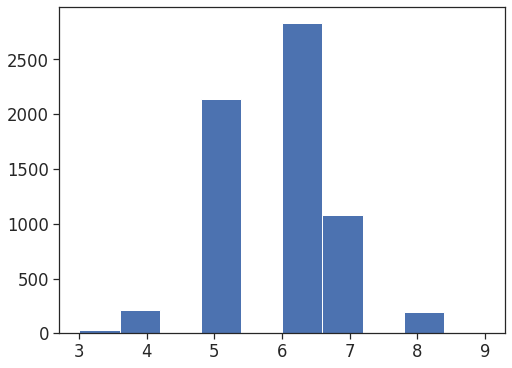

In [ ]:
# Analizar la variable de salida
quality = dataset.quality.to_numpy() #transforma la columna quality en un vector de valores
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(quality)

In [ ]:
dataset['binary_quality'] = dataset.quality.apply(lambda label: 0 if (label >=3 and label <= 6) else 1)

In [ ]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,binary_quality
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369,0
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361,0
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354,0
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325,0
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375,0


In [ ]:
print(dataset[dataset['binary_quality'] == 0].shape)
print(dataset[dataset['binary_quality'] == 1].shape)

(5220, 16)
(1277, 16)


In [ ]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,binary_quality
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369,0
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361,0
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354,0
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325,0
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375,0


In [ ]:
vendor_id = dataset['vendor_id']
print('Cantidad de ids de vendedor unicos {}'.format(np.unique(vendor_id).shape))

Cantidad de ids de vendedor unicos (500,)


# Limpieza de datos
*   Analizar la cantidad de NaNs
*   Darle un tratamiento a los NaNs
*   Verificar no estar cambiando las distribuciones




In [ ]:
nans = dataset.loc[dataset.isna().sum(axis=1) >= 1, :]
print('Cantidad de filas con nans {}'.format(nans.shape))

not_nans = dataset.loc[dataset.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))

dataset_not_nans = not_nans

Cantidad de filas con nans (34, 16)
Cantidad de filas sin nans (6463, 16)


(array([  30.,  214.,    0., 2128.,    0., 2820., 1074.,    0.,  192.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

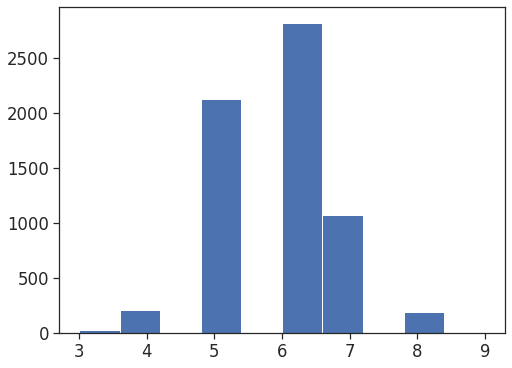

In [ ]:
quality = dataset_not_nans.quality.to_numpy()
fig, ax = plt.subplots(1,figsize=(8,6))
ax.hist(quality)

# Ingeniería de features básica

* Transformar el tipo en one-hot-encoding
* Hacer un analisis de correlaciones
* Hacer plot-box de las variables mas correlacionadas con la salida
* Transformar el vendor id en vendor idx
* Separar los datos en train (70%), validation (20%) y test (10%).
* Normalizar los datos para probar modelos con datos normalizados y sin normalizar

In [ ]:
dataset_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  binary_quality       

In [ ]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,binary_quality
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369,0
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361,0
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354,0
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325,0
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375,0


In [ ]:
print('Cantidad de type unicos en el dataset: {}'.format(np.unique(dataset.type).shape))

Cantidad de type unicos en el dataset: (2,)


In [ ]:
# Como solo tenemos 2 clases en el tipo, vamos a transformarlo usando one hot encoding

type_dummies= pd.get_dummies(dataset_not_nans.type, prefix='type')
dataset_encoded = pd.concat([dataset_not_nans, type_dummies], axis=1)
print(dataset_encoded.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  binary_quality       

In [ ]:
dataset_encoded.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,binary_quality,type_red,type_white
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369,0,0,1
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361,0,0,1
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354,0,0,1
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325,0,0,1
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375,0,0,1


In [ ]:
not_nans = dataset_encoded.loc[dataset_encoded.isna().sum(axis=1) == 0, :]
print('Cantidad de filas sin nans {}'.format(not_nans.shape))


Cantidad de filas sin nans (6463, 18)


In [ ]:
# remover las columnas que no vamos a usar

final_dataset = dataset_encoded.drop(['Unnamed: 0', 'type'], axis=1, inplace=False)
print(final_dataset.head())

   fixed acidity  volatile acidity  ...  type_red  type_white
0            7.0              0.27  ...         0           1
1            6.3              0.30  ...         0           1
2            8.1              0.28  ...         0           1
3            7.2              0.23  ...         0           1
4            7.2              0.23  ...         0           1

[5 rows x 16 columns]


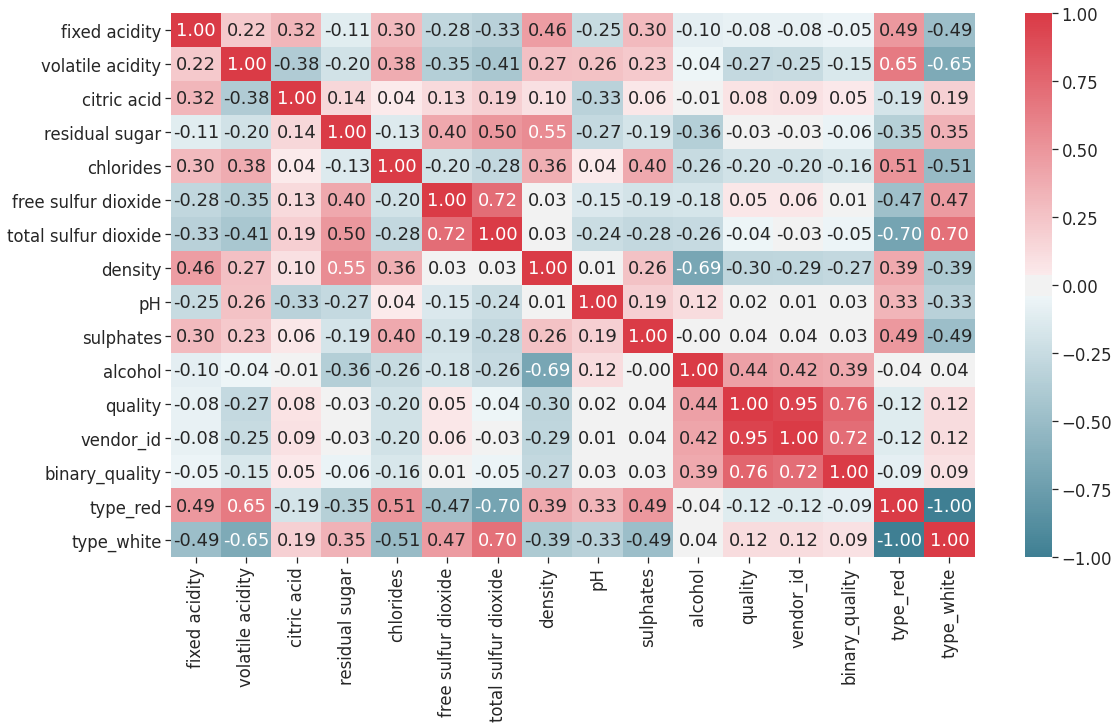

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(18, 10))
corr = final_dataset.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f3173660510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3173633590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f317360c5d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f317360c090>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3173660ad0>,
  <matplotlib.lines.Line2D at 0x7f31736135d0>]}

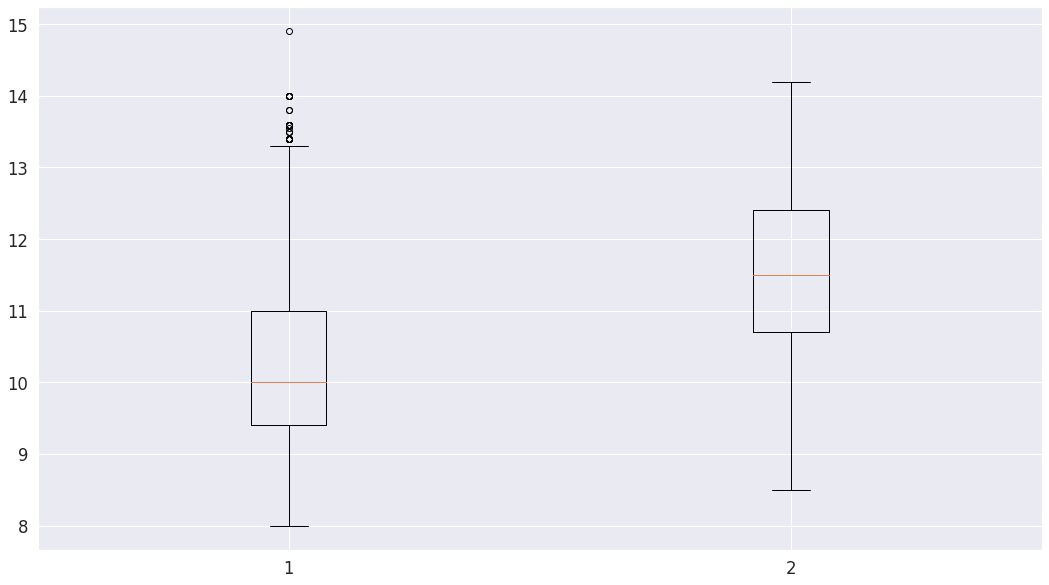

In [ ]:
# boxplot de la variable alcohol cuando binary_quality es 0 y cuando el binary_quality es 1
fig, ax = plt.subplots(1, figsize=(18,10))
ax.boxplot([final_dataset.loc[final_dataset['binary_quality'] == 0, 'alcohol'], 
            final_dataset.loc[final_dataset['binary_quality'] == 1, 'alcohol']])

In [ ]:
# transformar id en index

vendor_id = final_dataset['vendor_id'].to_numpy()

_, vendor_idx = np.unique(vendor_id, return_inverse=True)

vendor_id2idx = {id:idx for id,idx in zip(vendor_id, vendor_idx)}

# embeddings
"""
id(b1) = 1234500 -> 0   -> [3, 4, 2, 8]
id(b2) = 4321    -> 1   -> [10, 12 1, 5.5]
...
id(b500) = 10000 -> 499 -> [1, 1.1, 2, 3]
"""


'\nid(b1) = 1234500 -> 0   -> [3, 4, 2, 8]\nid(b2) = 4321    -> 1   -> [10, 12 1, 5.5]\n...\nid(b500) = 10000 -> 499 -> [1, 1.1, 2, 3]\n'

In [ ]:
final_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,binary_quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375,0,0,1


In [ ]:
final_dataset.count()

fixed acidity           6463
volatile acidity        6463
citric acid             6463
residual sugar          6463
chlorides               6463
free sulfur dioxide     6463
total sulfur dioxide    6463
density                 6463
pH                      6463
sulphates               6463
alcohol                 6463
quality                 6463
vendor_id               6463
binary_quality          6463
type_red                6463
type_white              6463
dtype: int64

In [ ]:
# separar los datos en train (70%), valid (20%) y test (10%)

"""
x_train                 todas las columnas menos binary_quality, quality, vendor_id
x_validation
x_test

y_train                 la columna binary_quality
y_validation
y_test

vendor_idx_train        la columna vendor_id transformada a vendor_idx con el diccionario
vendor_idx_validation
vendor_idx_test
"""

final_dataset_2 = final_dataset.drop(['binary_quality', 'quality', 'vendor_id'], axis=1, inplace=False)

n_samples = final_dataset_2.shape[0]
indexes = np.random.permutation(np.arange(0, n_samples))
train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size

y = final_dataset.binary_quality

x_train = final_dataset_2.iloc[train_idx,:]
vendor_idx_train = vendor_idx[train_idx]
y_train = y.iloc[train_idx].to_numpy()

x_validation = final_dataset_2.iloc[validation_idx,:]
vendor_idx_validation = vendor_idx[validation_idx]
y_validation = y.iloc[validation_idx].to_numpy()

x_test = final_dataset_2.iloc[test_idx, :]
vendor_idx_test = vendor_idx[test_idx]
y_test = y.iloc[test_idx].to_numpy()

#from sklearn.model_selection import train_test_split

#final_dataset_2_2 = final_dataset.drop(['binary_quality', 'quality', 'vendor_id'], axis=1, inplace=False)
#y_2 = final_dataset.binary_quality


#X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(final_dataset_2_2, y_2, test_size=0.1, random_state=1)

#X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, train_size=0.7, random_state=1)


In [ ]:
# normalizar los datos para que vayan entre 0 y 1
# Estandarizar tener certeza de que todos los datos se distribuyen de forma normal.

min_max_scaler = preprocessing.MinMaxScaler()

x_train_norm = min_max_scaler.fit_transform(x_train)
x_validation_norm = min_max_scaler.transform(x_validation)
x_test_norm = min_max_scaler.transform(x_test)

print(x_train_norm.min())
print(x_train_norm.max())

print(x_validation_norm.min())
print(x_validation_norm.max())

print(x_test_norm.min())
print(x_test_norm.max())

0.0
1.0000000000000002
-0.006593406593406591
1.3495934959349594
0.0
1.3164835164835165


# Modelo base
*   Hacer una clase que tenga el metodo fit y transform, pero que devuelva resultados completamente random.
*   ¿Cuál deberia ser el valor del AUC de este modelo?
*   Calcular el AUC con sklearn.



In [ ]:
class RandomModel(object):

    def fit(self, X, y):
        return None

    def predict(self, X):
        return np.random.randint(0,1, size=X.shape[0])

In [ ]:
random_model = RandomModel()
random_model.fit(x_train_norm, y_train)
rm_predictions = random_model.predict(x_validation_norm)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_validation, rm_predictions)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.5


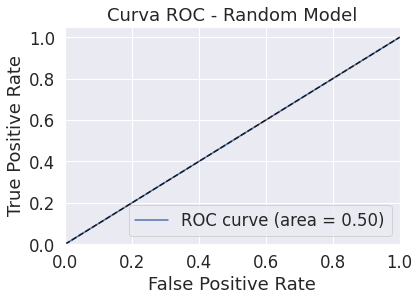

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Model')
plt.legend(loc="lower right")
plt.show()

# Regresión logística

*   Entrenar un modelo de regresión logística con los datos sin normalizar.
*   Entrenar un modelo de regresión logística con los datos normalizados.
*   Cual es el motivo de la diferencia?
*   Si la regresión logística no da un buen resultado, cual puede ser un motivo posible?




https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1, max_iter=1000, solver='sag')

In [ ]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(x_train_norm, y_train)

LogisticRegression(C=1, max_iter=1000, solver='sag')

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

In [ ]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(x_train_norm, y_train)

lr_prediction = lr_model.predict(x_validation_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_validation, lr_prediction)
roc_auc = metrics.auc(fpr, tpr)
print(metrics.auc(fpr, tpr))

0.6276768772024939


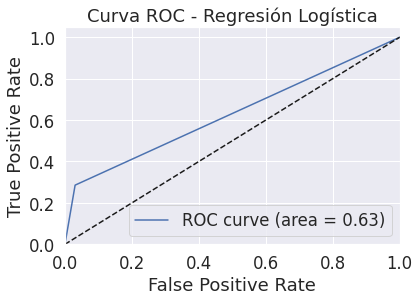

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

# Random forest
*   Entrenar un modelo de Random Forest con los datos sin normalizar.
*   Entrenar un modelo de Random Forest con los datos normalizados.
*   Hay diferencia? Si no la hay, cual es el motivo?.




In [ ]:
# Random forest, con datos normalizados

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
rf_model.fit(x_train_norm, y_train)

rf_valid_pred = rf_model.predict(x_validation_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_validation, rf_valid_pred)
roc_auc = metrics.auc(fpr, tpr)
metrics.auc(fpr, tpr)



0.7781919219300624

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
rf_model.fit(x_train, y_train)

rf_valid_pred = rf_model.predict(x_validation)
fpr, tpr, thresholds = metrics.roc_curve(y_validation, rf_valid_pred)
metrics.auc(fpr, tpr)

0.7802927622661969

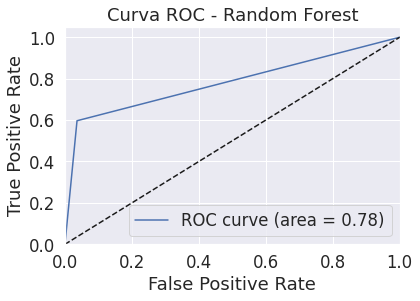

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#Deep learning sin embeddings

* Entrenar un modelo de deep learning con un solo hidden layer y con los datos normalizados.
* ¿Qué función de activación debería utilizar en la salida?
* ¿Cual es el motivo?


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:

def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.Activation('sigmoid'))

  return model

model = create_model()

metrics = [tf.keras.metrics.AUC()]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

model.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(x_validation_norm, y_validation),
)





Epoch 1/10
71/71 [==============================] - 1s 10ms/step - loss: 0.4587 - auc_6: 0.7058 - val_loss: 0.3923 - val_auc_6: 0.7901
Epoch 2/10
71/71 [==============================] - 0s 6ms/step - loss: 0.4122 - auc_6: 0.7862 - val_loss: 0.3954 - val_auc_6: 0.8116
Epoch 3/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4056 - auc_6: 0.7957 - val_loss: 0.3874 - val_auc_6: 0.8079
Epoch 4/10
71/71 [==============================] - 0s 5ms/step - loss: 0.4020 - auc_6: 0.7998 - val_loss: 0.3744 - val_auc_6: 0.8199
Epoch 5/10
71/71 [==============================] - 0s 5ms/step - loss: 0.3990 - auc_6: 0.8034 - val_loss: 0.3737 - val_auc_6: 0.8200
Epoch 6/10
71/71 [==============================] - 0s 5ms/step - loss: 0.3958 - auc_6: 0.8073 - val_loss: 0.3701 - val_auc_6: 0.8243
Epoch 7/10
71/71 [==============================] - 1s 7ms/step - loss: 0.3971 - auc_6: 0.8061 - val_loss: 0.3718 - val_auc_6: 0.8252
Epoch 8/10
71/71 [==============================] - 0s 7ms/st

In [ ]:
print(x_train.shape)

(4524, 13)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4524 entries, 5362 to 5723
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4524 non-null   float64
 1   volatile acidity      4524 non-null   float64
 2   citric acid           4524 non-null   float64
 3   residual sugar        4524 non-null   float64
 4   chlorides             4524 non-null   float64
 5   free sulfur dioxide   4524 non-null   float64
 6   total sulfur dioxide  4524 non-null   float64
 7   density               4524 non-null   float64
 8   pH                    4524 non-null   float64
 9   sulphates             4524 non-null   float64
 10  alcohol               4524 non-null   float64
 11  type_red              4524 non-null   uint8  
 12  type_white            4524 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 433.0 KB


https://keras.io/api/losses/

In [ ]:
y_pred_keras = model.predict(x_validation_norm,batch_size=64).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_validation, y_pred_keras)


In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

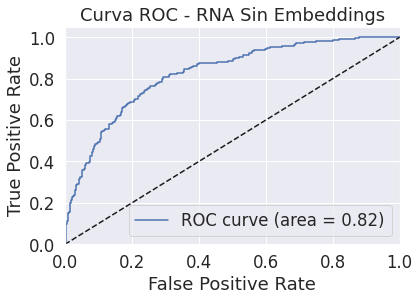

In [ ]:
plt.figure()
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - RNA Sin Embeddings')
plt.legend(loc="lower right")
plt.show()

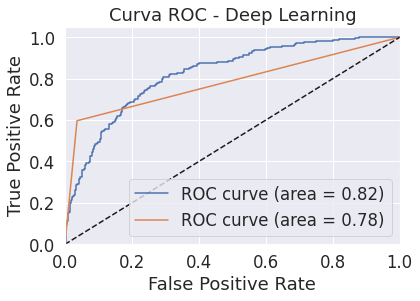

In [ ]:
plt.figure()
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Deep Learning')
plt.legend(loc="lower right")
plt.show() #EMPROLIJAR

# Deep learning con embeddings
* Entrenar un modelo de deep learning con un solo hidden layer y con los datos normalizados.
* Se utiliza el vendor id o el vendor idx como input? Cual es el motivo?
* Si los resultados son mejores, cuál puede ser el motivo?

In [ ]:
def create_model_2():
    # create model
    features_input = tf.keras.Input(shape=(13,), name='features')

    vendor_idx_input = tf.keras.Input(shape=(1,), name='vendor_idx')
        
    vendor_embedding = tf.keras.layers.Embedding(vendor_idx.max()+1, 8, 
                                                 input_length=1, name='vendor_embedding')(vendor_idx_input)

    vendor_embedding = tf.keras.layers.Flatten()(vendor_embedding)

    concatenated = tf.keras.layers.Concatenate()([features_input, vendor_embedding])
    print(concatenated)
    out = tf.keras.layers.Dense(100)(concatenated)
    out = tf.keras.layers.Activation('relu')(out)
    out = tf.keras.layers.Dense(1)(out)
    out = tf.keras.layers.Activation('sigmoid')(out)

    model = tf.keras.Model(
        inputs = [features_input, vendor_idx_input],
        outputs = out,
    )

    return model

In [ ]:
model_2 = create_model_2()

KerasTensor(type_spec=TensorSpec(shape=(None, 21), dtype=tf.float32, name=None), name='concatenate_3/concat:0', description="created by layer 'concatenate_3'")


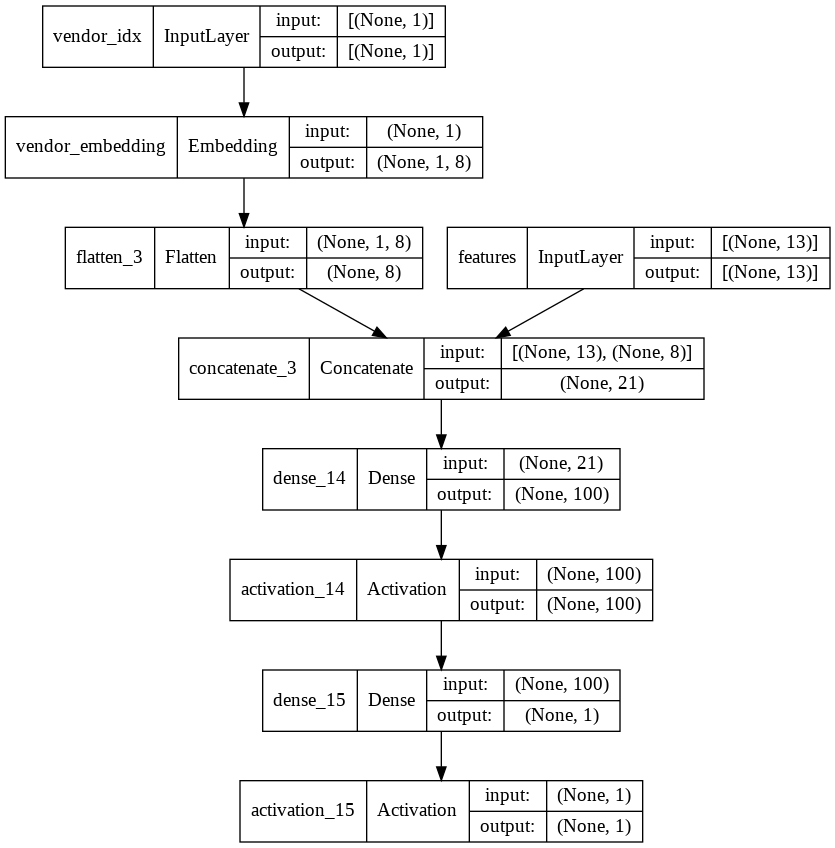

In [ ]:
plot_model(model_2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
metrics = [
    tf.keras.metrics.AUC()
]

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

model_2.fit(
    [x_train_norm.astype(np.float32), vendor_idx_train.astype(np.float32)], 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=16,
    validation_data=([x_validation_norm, vendor_idx_validation], y_validation),
)

Epoch 1/10
283/283 [==============================] - 3s 8ms/step - loss: 0.1027 - auc_7: 0.9883 - val_loss: 0.0156 - val_auc_7: 0.9999
Epoch 2/10
283/283 [==============================] - 2s 7ms/step - loss: 3.4094e-04 - auc_7: 1.0000 - val_loss: 0.0121 - val_auc_7: 0.9999
Epoch 3/10
283/283 [==============================] - 2s 7ms/step - loss: 7.9346e-05 - auc_7: 1.0000 - val_loss: 0.0131 - val_auc_7: 0.9999
Epoch 4/10
283/283 [==============================] - 2s 7ms/step - loss: 4.0175e-05 - auc_7: 1.0000 - val_loss: 0.0138 - val_auc_7: 0.9999
Epoch 5/10
283/283 [==============================] - 2s 7ms/step - loss: 2.4425e-05 - auc_7: 1.0000 - val_loss: 0.0143 - val_auc_7: 0.9999
Epoch 6/10
283/283 [==============================] - 2s 7ms/step - loss: 1.6303e-05 - auc_7: 1.0000 - val_loss: 0.0147 - val_auc_7: 0.9999
Epoch 7/10
283/283 [==============================] - 2s 7ms/step - loss: 1.1530e-05 - auc_7: 1.0000 - val_loss: 0.0150 - val_auc_7: 0.9999
Epoch 8/10
283/283 [====

In [ ]:
model_2.save('model_with_embeddings.h5')

In [ ]:
!pip list | grep tensorflow

tensorflow                    2.7.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.7.0
tensorflow-gcs-config         2.7.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.22.0
tensorflow-metadata           1.4.0
tensorflow-probability        0.15.0
